In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets # sklearn => 사이키런
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 회귀분석이란?
- 회귀분석(regression analysis)은  D 차원 벡터 독립 변수  x 와 이에 대응하는 스칼라 종속 변수  y 간의 관계를 정량적으로 찾아내는 작업이다.

- 회귀분석에는 결정론적 모형(deterministic Model)과 확률적 모형(probabilistic Model)이 있다. 우선 결정론적 모형부터 설명한다. 결정론적 회귀분석 모형은 독립 변수  x 에 대해 대응하는 종속 변수  y 와 가장 비슷한 값  y^ 를 출력하는 함수  f(x) 를 찾는 과정이다.

                    y^=f(x)≈y

## 선형회귀분석
- 만약 독립 변수  x 와 이에 대응하는 종속 변수  y 간의 관계가 다음과 같은 선형 함수  f(x) 이면 선형 회귀분석(linear regression analysis)이라고 한다.

            y^=w0+w1x1+w2x2+⋯+wDxD=w0+wTx
 
- 위 식에서  w0,⋯,wD 를 함수  f(x) 의 계수(coefficient)이자 이 선형 회귀모형의 모수(parameter)라고 한다.

https://datascienceschool.net/view-notebook/58269d7f52bd49879965cdc4721da42d/

# 로지스틱 회귀분석¶

- 로지스틱(Logistic) 회귀분석은 회귀분석이라는 명칭과 달리 회귀분석 문제와 분류문제 모두에 사용할 수 있다. 로지스틱 회귀분석 모형에서는 종속변수가 이항분포를 따르고 그 모수  μ 가 독립변수  x 에 의존한다고 가정한다.

        p(y∣x)=Bin(y;μ(x),N)
 
- 위 식에서 보듯이 로지스틱 함수는  y 의 값이 특정한 구간내의 값( 0∼N )만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있다.

- 또는 이항 분포의 특별한 경우( N=1 )로  y 가 베르누이 확률분포인 경우도 있을 수 있다. 여기에서는 베르누이 확률분포를 따르는 로지스틱 회귀분석만 고려하기로 한다.

            p(y∣x)=Bern(y;μ(x))
 
- 종속변수  y 가 0또는 1인 분류 예측 문제를 풀 때는  x  값을 이용하여  μ(x) 를 예측한 후 다음 기준에 따라  y^ 값을 출력한다.

            y^={10 if μ(x)≥0.5 if μ(x)<0.5
 
- 회귀분석을 할 때는  y^ 으로  y=1 이 될 확률값  μ(x) 를 직접 사용한다.

                y^=μ(x)
 
## 시그모이드함수¶
- 로지스틱 회귀모형에서는 베르누이 확률분포의 모수  μ 가  x 의 함수라고 가정한다.  μ(x) 는  x 에 대한 함수를 0부터 1사이의 값만 나올 수 있도록 시그모이드함수(sigmoid function)라는 함수를 사용하여 변형한 것을 사용한다.

- 시그모이드함수는 종속변수의 모든 실수 값에 대해 유한한 구간  (a,b)  사이의 한정된(bounded) 값을 가지고

            a<f(x)<b
 
- 항상 양의 기울기를 가지는 단조증가하는
            
            a>b→f(a)>f(b)
 
함수의 집합을 말한다. 실제로는 다음과 같은 함수들이 주로 사용된다.

- 로지스틱(Logistic)함수
    
        logitstic(z)=σ(z)=11+exp(−z)
 
- 하이퍼볼릭탄젠트(Hyperbolic tangent)함수
    
        tanh(z)=sinhzcoshz=(ez−e−z)/2(ez+e−z)/2=2σ(2z)−1
 
- 오차(error)함수
    
        erf(z)=2π−−√∫z0e−t2dt
 
하이퍼볼릭탄젠트함수는 로지스틱함수를 위아래 방향으로 2배 늘리고 좌우 방향으로 1/2로 축소한 것과 같다.

https://uncoded.tistory.com/entry/Python%EC%9C%BC%EB%A1%9C-Logistic-Regression-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0

# 와인으로 '선형회귀분석' 공부하기

In [2]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)
redwine["type"] = "red"
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)
whitewine["type"] = "white"
wine = redwine.append(whitewine)    #redwine에 whitewine을 붙여라.(밑으로 붙였네~)

In [6]:
print(redwine.shape)
print(whitewine.shape)
print(wine.shape) # 전체 set이 wine set이다.

(1599, 13)
(4898, 13)
(6497, 13)


In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
X = wine.drop(['type','quality'], axis = 1)
X.shape
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
y = wine.quality # y는 '실제데이터'를 의미한다.
print(y.shape)
print(y)        # 실제데이터 quality 를 보여준다.

(6497,)
0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64


In [12]:
regr = LinearRegression()
# LinearRegression :  선형회귀 문제 풀기... -> 직선을 선형알고리즘으로 보면서 푼다는 뜻.

In [13]:
regr.fit(X,y) # X(전체 데이터), y(실제데이터 quality)를 넣어주면 알아서 학습해준다.
#fit : '학습시켜주세요!!'라고 하는 함수

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#예측해봅시다.
r = regr.predict(X) 
print(r[0]) # 첫번째 와인 등급 => 실제 데이터는 5
print(r[1]) # 두번째 와인 등급

4.997607397150453
4.924992756593674


In [19]:
r = regr.predict(X) # r = 선형회귀로 예측된 qulity 값
print('선형회귀로 예측된 qulity 값:',r)
print('오차:',np.abs(y-r)) # y(실제데이터) 와 r(선형 회귀예측데이터)의 차이 = 오차
# 오차를 구해보니, 엄청 작다는 것을 알 수 있음.
print('오차평균:',np.mean(np.abs(y-r))) 
# 평균적으로 0.56정도만 오차가 난다... 
#이 오차가 작은 것인지.. 큰것인지..'사장님'은 잘 모른다ㅠㅠ

선형회귀로 예측된 qulity 값: [4.9976074  4.92499276 5.03466303 ... 5.41936126 6.43265584 6.2057268 ]
오차: 0       0.002393
1       0.075007
2       0.034663
3       0.319667
4       0.002393
          ...   
4893    0.168984
4894    0.608278
4895    0.580639
4896    0.567344
4897    0.205727
Name: quality, Length: 6497, dtype: float64
오차평균: 0.568315902311135


[5. 5. 5. ... 5. 6. 6.]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4893    0.0
4894    1.0
4895   -1.0
4896   -1.0
4897    0.0
Name: quality, Length: 6497, dtype: float64


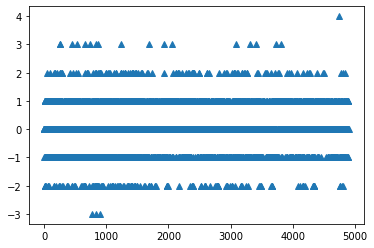

In [22]:
r = regr.predict(X)
print(np.round(r)) # 등급을 반올림한다.

print('=======================================')

result = np.round(r)-y
print(result)
# result가 0 이면? : 정확히 예측했다는 의미

print('=======================================')

plt.plot(result, '^')
# 오류(-3~4)가 어떻게 분포가 되어있는지 시각적으로 평가 가능
# result = np.round(r) - y     이 '0'일때가 '정확히' 맞췄다는 의미
# 4에 분포되어있는 것은 실제갑이랑 등급이 4나 차이난다는 것.. 완전 못했네:)

In [32]:
np.round(r) - y == 0
# 결과(오차)가 0 이니? 하고 묻는 함수

print(np.round(r) - y == 0)
print('=======================================================')


np.sum(np.round(r) - y == 0)
# 오차가 '0'이 3465개 있다. 전체 데이터 중에서 3465개는 정확히 맞추었다는 의미.
# 전체데이터가 6천 몇개인데 잘 맞춘 것은 아니라고 볼 수 있네^^(사장님 입장)
# 사장님..근데 너무 야박하지 않니..?


print('정확히 맞춘 갯수:',np.sum(np.round(r) - y == 0))
print('=======================================================')


np.sum(np.abs(np.round(r)-y)<=1)




# 야박하니깐, 1정도의 등급차이는 봐주자!!! 
# 1등급 정도의 오차는 괜찮다!!! 라고 이야기해야지:)사장님한테..
# 이렇게 보고하면 '6169개의 맞았네^^ 쓸만하네~'' 라고 사장님이 생각할 수 있음
print('"1"정도 오차 허용으로 맞춘 갯수:',np.sum(np.abs(np.round(r)-y)<=1))

0        True
1        True
2        True
3        True
4        True
        ...  
4893     True
4894    False
4895    False
4896    False
4897     True
Name: quality, Length: 6497, dtype: bool
정확히 맞춘 갯수: 3465
"1"정도 오차 허용으로 맞춘 갯수: 6169


In [36]:
y.size # y의 데이터 갯수 = 6497

#결론 : '와인의 품질을 맞출 확률은 약 95%입니다.' 라고 보고할 수 있다^^
np.sum(np.abs(np.round(r)-y)<=1) / y.size

0.9495151608434662

### 선형회귀분석¶
- 만약 독립 변수 x 와 이에 대응하는 종속 변수 y 간의 관계가 다음과 같은 선형 함수 f(x) 이면 선형 회귀분석(linear regression analysis)이라고 한다.

      y^=w0+w1x1+w2x2+⋯+wDxD=w0+wTx
- 위 식에서 w0,⋯,wD 를 함수 f(x) 의 계수(coefficient)이자 이 선형 회귀모형의 모수(parameter)라고 한다.

[ 6.76839156e-02 -1.32789221e+00 -1.09656648e-01  4.35587507e-02
 -4.83713531e-01  5.96988830e-03 -2.48129841e-03 -5.49669422e+01
  4.39296072e-01  7.68251760e-01  2.67030009e-01]


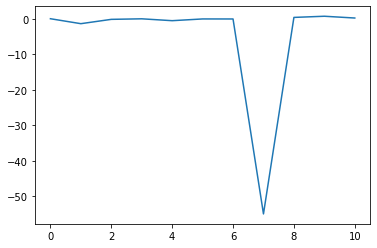

In [40]:
print(regr.coef_)  

plt.plot(regr.coef_)

# 그래프 의미 : w를 다 출력해보았더니 나오는 것... 
# 7번째가 반비례 관계(음의 관계)가 있어, 'quality'에 심각한 영향을 준다는 의미
# 7번째 (실지적으로 8번째 컬럼) => PH 
# pH가 높으면, quality가 안좋다는 의미...
# 결론 : 좋은 quality 등급을 위하여, pH는 낮아야 한다. 

In [44]:
# 직접 '선형회귀'에다 새로운 wine 의 데이터를 넣어보자.
s = np.array([7.4,0.5,0.2,0.3,0.2,0.4,0.2,3,-0.4,1.0,0.7])
print(regr.predict([s])) # 말도 안되는 등급인 -108등급 나왔다. 

z = np.array([7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4])
print(regr.predict([z])) # 4.99등급(약 5등급)이 나왔다.

[-108.62542255]
[4.9976074]


# 랜덤 100개 숫자 뽑아내서, 선형회귀분석 공부하기

In [145]:
samples = 100

#print([samples,2])   =>  [100, 2]
# np.random.normal(0, 1, size=[samples,2]) => 0은 평균 / 1은 표준편차
x_data0 = np.random.normal(0, 1, size=[samples,2])
x_data1 = np.random.normal(5, 1, size=[samples,2])
#print(x_data0)

#주어진 데이터
x_data = np.vstack([x_data0, x_data1]) #vstack : 밑으로 쌓아라
print(x_data)
print(x_data.shape)

[[ 1.26663381 -0.04938483]
 [-1.07936903 -0.20175382]
 [-0.5329683   0.41679468]
 [-0.76447537  1.06083298]
 [ 1.16578298 -0.8231462 ]
 [ 0.41266785 -1.51082504]
 [ 0.64967653  0.1830828 ]
 [ 0.24080463  0.50280577]
 [ 0.22693999 -1.42026637]
 [ 0.23936073 -0.09222655]
 [ 0.62849689  1.52882622]
 [ 0.11242365 -0.56301138]
 [-1.5699035   0.10557744]
 [ 0.61986385 -0.65799917]
 [-0.11535419  1.07364095]
 [-0.14812445 -1.12081519]
 [ 0.18682532 -0.3479458 ]
 [-1.61154717 -0.54685339]
 [-0.69335014 -0.21065578]
 [-0.52136674  0.28261621]
 [-0.08635637 -1.35016178]
 [ 0.18269258 -0.82901741]
 [ 0.51797813  0.15956859]
 [ 1.55604413 -1.5309706 ]
 [ 0.91962106 -0.30468181]
 [ 2.18822414  0.35675492]
 [ 0.18056506  0.05808393]
 [-1.21855393  1.13272668]
 [-0.09502566  0.40858605]
 [-0.9563929  -0.16802152]
 [ 0.53651259 -0.49263391]
 [ 0.27690785  0.82699167]
 [ 0.81679227  1.02468103]
 [-0.99394309  0.63977599]
 [-1.53227131 -1.59477995]
 [ 0.77621146  0.84220425]
 [-2.01322035  0.48330052]
 

In [98]:
# y값을 0과 1로만 나타내어라.
y_data = np.vstack([np.zeros(samples).reshape(samples,1) 
                    , np.ones(samples).reshape(samples,1) ]) 

# np.zeros(samples).reshape(samples,1) : 0으로 된 행렬 100X1 만들라
# np.ones(samples).reshape(samples,1) : 1로 된 행렬 100X1  만들라

#print(y_data.shape)
#print(y_data)

In [99]:
# 200번의 루프를 돌며, 0이면 red 이고 1이면 blue
colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
#print(colors)

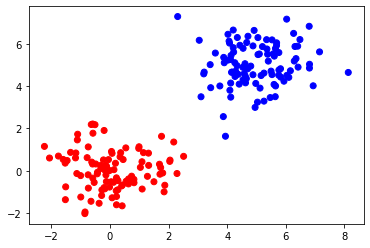

In [100]:

plt.scatter(x_data[:,0], x_data[:,1], color=colors)
# 빨간점의 레이블이 0 인거고, 파란점의 레이블이 1인것이다.

In [76]:
# 리니어 리그레션으로 풀은 것... z=w1x1+w2y2+b
regr.fit(x_data, y_data) #fit : '학습시켜주세요!!'라고 하는 함수
# x_data(실제데이터)를 y_data(0과 1)로 표현하게 학습시켜보자

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# 앞에것 10개를 예측해보세요... 
# 빨간색 데이터에는 0이란 값을 주었기 때문에
# 0보다 작은 것들은 빨간색이다.
regr.predict(x_data[0:10])


print(regr.predict(x_data[0:10]))
print('=======================================================')
# z=w1x1+w2y2+b 에서 x1 = 2.7 이고 y2 = -2이다.
# w1과 w2 는 선형회귀분석 처리로 이미 컴퓨터가 만들어 줬다.
# 3차원 공간이라고 생각하자.
# 빨간색과 파란색 그 중간 허공간에 있는 점(값)!
# 0.5보다 작으면 0에 가까운 "빨간색", 0.5보다 크면 1에 가까운 "파란색"이 나온다.
regr.predict([[2.7,-2]])
print(regr.predict([[2.7,-2]])) # 0.5보다 작아서 빨간색

print('=======================================================')

regr.predict([[2.7,2.1]])
print(regr.predict([[2.7,2.1]])) # 0.5보다 작아서 빨간색

[[ 0.08426842]
 [-0.11390779]
 [-0.19101917]
 [ 0.18795428]
 [ 0.1176149 ]
 [ 0.16123256]
 [ 0.18889465]
 [-0.15447357]
 [ 0.04104149]
 [ 0.01361217]]
[[0.1113546]]
[[0.48112098]]


In [110]:
# h = (regr.predict(x_data)[:,0] > 0.5) => *1을 안하면 False/True나옴
h = (regr.predict(x_data)[:,0] > 0.5)*1
#print(regr.predict(x_data))
#print(regr.predict(x_data)[:,0])
print('h:',h)

# ASK!!!

print(np.sum(h == y_data[:,0]))
# 0은 negative sample / 1은 positive sample
print(np.sum(h == y_data[:,0]) / y_data.shape[0])

h: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
200
1.0


# 리그레이션(선형회귀분석)

In [113]:
# 리그레이션(선형회귀분석)으로 만든 3차원 그래프
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5

xx, yy = np.mgrid[-10:10:0.5, -10:10:0.5]
# grid = 학습결과를 확인할 수 있게하는 방법
grid = np.c_[xx.flatten(), yy.flatten()]

result = regr.predict(grid)

fig = plt.figure()
ax = plt.axes(projection="3d")


ax.scatter3D(xx.flatten(), yy.flatten(), result, 'r')

In [121]:
regr.predict([[2.7,-2]])

array([[0.1113546]])

# 로지스틱 회귀분석 공부 (= '분류'하기)

In [118]:
print('x_data:',x_data)
print('=======================================================')
print('y_data:',y_data)
print('=======================================================')
print(x_data.shape)
print(y_data.shape)

x_data: [[-0.31308137  0.11510212]
 [-1.59747182  0.53864942]
 [ 0.55193617 -0.49176221]
 [-1.13149532 -0.12761464]
 [ 0.98072925  1.0597138 ]
 [ 1.72862413  0.15492359]
 [-0.77938091  0.62252061]
 [-0.99643303 -1.23763781]
 [-0.05234251  0.52881683]
 [ 0.18650641  0.35736431]
 [ 1.27753554 -0.25987992]
 [ 0.73757481 -0.2529194 ]
 [-0.18412859  0.04300852]
 [-1.52883896  0.3635712 ]
 [-0.58734769 -0.34479648]
 [-0.28519244 -1.16499244]
 [ 2.28627243 -0.12676964]
 [ 0.21289202 -0.94009696]
 [-0.37100468 -1.53144825]
 [ 1.09731716 -0.85982022]
 [ 0.71513317 -0.47468642]
 [-2.06325906  0.60447058]
 [-0.17632044 -0.85030751]
 [ 0.39821941 -0.7127927 ]
 [ 0.81945853 -0.56162585]
 [-1.34429645  0.87076189]
 [ 2.51176816  0.68388411]
 [-0.12320222 -0.50794309]
 [-2.23659012  1.15292956]
 [ 0.07087663  0.82585618]
 [ 1.03681532  0.16304578]
 [-0.74628656 -0.1873946 ]
 [-0.63879246  2.18632452]
 [ 1.49950138 -0.5156621 ]
 [-0.13846874 -0.19629859]
 [-0.85769526 -2.02074374]
 [ 0.12285376 -0.540

In [119]:
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
log_reg.predict([[2.7,-2]])  # array([0.])
log_reg.predict([[100,100]]) # array([1.])

# 0 혹은 1로만 답이 나온다.. 
# => 따라서 분류를 위하여, 시그모이드 함수를 사용해야 한다.

array([0.])

## predict_proba
https://datascienceschool.net/view-notebook/e2790743099742a396cfa4955ffc8a1f/

In [137]:
# 시그모이드 함수 사용 
p = log_reg.predict_proba([[1,1]])
# p => [[0.9849997 0.0150003]] => 확률 = 빨간색 : 0.98 / 파란색 : 0.015

print(p)



# 빨간색이 나올 확률
print('red:', p[0][0])


# 파란색이 나올 확률
print('blue:',p[0][1])



[[0.9849997 0.0150003]]
red: 0.984999702087934
blue: 0.015000297912065988


In [144]:
# 로지스틱 리그레이션으로 학습된 결과이다. 
# 시그노이드 함수형태로 그래프가 나온다.
xx, yy = np.mgrid[-10:10:0.5, -10:10:0.5]
grid = np.c_[xx.flatten(), yy.flatten()]

result = log_reg.predict_proba(grid)[:,1]

fig = plt.figure()
ax = plt.axes(projection="3d")


ax.scatter3D(xx.flatten(), yy.flatten(), result, 'r') 

## Y = wx+b
## ↓

## Y = w1x1  + w2x2 + b
## ↓

### Y = S(w1x1  + w2x2 + b)    
### => 시그노이드 함수를 사용한 것.. 비선형 함수가 들어가 있기 때문에 선형으로 나올 수 없다.


# 선형회귀분석¶

- 만약 독립 변수 x 와 이에 대응하는 종속 변수 y 간의 관계가 다음과 같은 선형 함수 f(x) 이면 선형 회귀분석(linear regression analysis)이라고 한다.

        y^=w0+w1x1+w2x2+⋯+wDxD=w0+wTx
- 위 식에서 w0,⋯,wD 를 함수 f(x) 의 계수(coefficient)이자 이 선형 회귀모형의 모수(parameter)라고 한다.

In [139]:
# ASK!!
y = log_reg.coef_[0][0]*100 + log_reg.coef_[0][1]*100 + log_reg.intercept_
print(y)
print(1/(1+np.exp(-y)))

[280.44598167]
[1.]


## '가상데이터' 평면에서 '원본데이터'는 어디에 찍혀있는가?

In [229]:
xx, yy = np.mgrid[-2:8:0.2,  -2:8:0.2]
grid = np.c_[xx.flatten(), yy.flatten()]
p = log_reg.predict_proba(grid)

p = p[:,1]  # p값을 기준으로 해서, 확률 값을 가져온다.

#가상의 데이터 = 가짜 데이터를 그린다. (2D평면으로)
colors = ['red' if i < 0.5 else 'blue' for i in p]
#alpha는 뿌옇게 그린다는 것
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2) 


# 원본데이터를 그린다.
colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)


# 그래프를 토대로, '파란색'과 '빨간색'을 분류하는 '선'을 찾을 수 있다.
# '선'을 토대로, 어느 곳이 빨간색 or 파란색인지 분류하며 평가할 수 있다.

# 내가 당뇨병일까? 아닐까?

In [149]:
#1
data = np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
print(data.shape)

"""
임신횟수
글루코스 내성 실험 후의 혈당수치
확장기 혈압(mm Hg)
상완 삼두근 피부 두께 (mm)
혈액내 인슐린 수치 (mu U/ml)
BMI(비만도) 수치 (weight in kg/(height in m)^2)
당뇨병 가족력: 계산식은 데이터세트의 출처에서 확인하세요.
나이 (years)
당뇨병 여부 (0 or 1; 1은 발병)
"""

label = ["임신횟수", "글루코스 내성 실험 후의 혈당수치", "확장기 혈압", "상완 삼두근 피부 두께",
         "혈액내 인슐린 수치", "BMI", "당뇨병 가족력", "나이"]


(768, 9)


In [156]:
dim = 8
x_data = data[:, 0:dim]
y_data = data[:, dim]

In [161]:
#print(x_data)
#print(y_data)

In [159]:
y_data = y_data.reshape(768,1)   
print(x_data.shape)
print(y_data.shape)

(768, 8)
(768, 1)


In [165]:
mx = np.max(x_data, axis=0)
print(mx) # 각 열에서 최대값을 가져왔다.

[ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]


### 당뇨병 유발하는 '요소'들의 w (가중치) 구하기

In [173]:
# 1. 학습시키기
log_reg.fit(x_data, y_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- z = S(w1x1+w2y2+w3s3 + ...... + w8h8) = 1 or 0

즉, 시그모이드 함수를 써서 당뇨병인지 아닌지를 판별하는 것이다.
밑에 나오는 숫자들이 각각 w1(임신횟수),w2(글루코스),w3....w8(나이)까지 들어갈 것들이란 것!!

In [174]:
for i in range(dim) :
    print(label[i], log_reg.coef_[0,i])

    
print('=======================================================')    
print('log_reg.coef_:',log_reg.coef_)

임신횟수 0.1359901412917452
글루코스 내성 실험 후의 혈당수치 0.03429416125425302
확장기 혈압 -0.012607102035581491
상완 삼두근 피부 두께 -0.0036708094698981006
혈액내 인슐린 수치 -0.0009429642609238423
BMI 0.08908182478527499
당뇨병 가족력 1.5164656688092761
나이 0.010557173615741048
log_reg.coef_: [[ 1.35990141e-01  3.42941613e-02 -1.26071020e-02 -3.67080947e-03
  -9.42964261e-04  8.90818248e-02  1.51646567e+00  1.05571736e-02]]


In [177]:
# 2. 예측하기
p = log_reg.predict(x_data)


In [181]:
# ASK!!!
# 3. 성능평가
# 예측된 데이터(p)와 실제 데이터(y_data)가 얼마나 평균적으로 같은지
np.mean(p == y_data)

# 57% 정도만 나온다..
#이는 로지스틱스 회귀가 '당뇨병' 측정하기에 좋은 방법은 아니라는 뜻


0.5688340928819444

### 나이가 60일때 당뇨병.. 어떻게 될까??

- 임신횟수 : 0 
- 글루코스 내성 실험 후의 혈당수치 : 90
- 확장기 혈압(mm Hg) : 66
- 상완 삼두근 피부 두께 (mm) : 29
- 혈액내 인슐린 수치 (mu U/ml) : 0 
- BMI(비만도) 수치 (weight in kg/(height in m)^2) : 26.6
- 당뇨병 가족력: 0.351
- 나이 :30


In [184]:
x_data2 = np.array([
    [0,90,66,29,0,26.6,0.351,30],
    [0,90,66,29,0,26.6,0.351,60]
])
# 당뇨병일 확률 계산
# 나이만 60으로 변경, 당뇨병 확률 

log_reg.predict_proba(x_data2)

#        발병x 확률(0),  발병o확률(1)
#array([[0.95505849, 0.04494151],
#       [0.93932875, 0.06067125]])

array([[0.95505849, 0.04494151],
       [0.93932875, 0.06067125]])

In [185]:
x_data3 = np.array([
    [0,90,66,29,0,26.6,0.351,30],
    [0,90,66,29,0,26.6,0.751,60]
])
# 당뇨병일 확률 계산
# 가족력 0.751으로 변경, 당뇨병 확률 

log_reg.predict_proba(x_data3)

#      발병x 확률(0),  발병o확률(1)
#array([[0.95505849, 0.04494151],
#       [0.89407983, 0.10592017]])

array([[0.95505849, 0.04494151],
       [0.89407983, 0.10592017]])

In [189]:
# 각각의 축에서의 최댓값
mx = np.max(x_data, axis=0)
print(mx)   


[ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]


- x_data = x_data /[17, 199, 122 .... ]  => 각각의 값으로 나누기를 해주는 것

- numpy의 브로드 캐스팅 같은 것.. 즉  x_data/17 , x_data/199, x_data/122 해주는 것


In [193]:
# ASK!! 그래서 이게 의미하는게 뭐야?
x_data = x_data/mx
print(x_data)

[[7.1838222e-05 9.4373355e-08 3.2500736e-07 ... 1.6574835e-06
  1.8281257e-02 1.1615286e-06]
 [1.1973037e-05 5.4200918e-08 2.9792338e-07 ... 1.3121744e-06
  1.0234004e-02 7.2014780e-07]
 [9.5784293e-05 1.1669139e-07 2.8889539e-07 ... 1.1493860e-06
  1.9593308e-02 7.4337828e-07]
 ...
 [5.9865182e-05 7.7156592e-08 3.2500736e-07 ... 1.2924426e-06
  7.1433932e-03 6.9691714e-07]
 [1.1973037e-05 8.0344890e-08 2.7083945e-07 ... 1.4848291e-06
  1.0175690e-02 1.0918369e-06]
 [1.1973037e-05 5.9302177e-08 3.1597932e-07 ... 1.4996280e-06
  9.1843624e-03 5.3430318e-07]]


In [196]:
# ASK!!!! 이거는 왜 성능이 mx 만으로도 향상이 되었다는거지..?
# 성능이 향상되기 전의 데이터
x_data2 = np.array([
    [0,90,66,29,0,26.6,0.351, 30],
    [0,90,66,29,0,31.0,0.351, 30],
])


# 성능이 향상된 데이터
x_data2 = x_data2 /mx

print(log_reg.predict_proba(x_data2))

[[9.99713116e-01 2.86884039e-04]
 [9.99711436e-01 2.88564271e-04]]


# Soft Max 알고리즘

In [201]:
# ASK!!! 그래서 이거의 기능은 뭔데.. 왜 이거 배웠는데ㅠㅠ?
p = np.array([1.2, 2.4, 4.8])
p_ = p/np.sum(p)
#p_ = p(백터)/np.sum(p)(상수)

print(p_)


# exp : 2.7

#softmax 알고리즘
p2 = np.exp(np.array([1.2,2.4,4.8]))   # 2.7의 1.2승 / 2.7의 2.4승 / 2.7의 4.8승
p2_=p2/np.sum(p2)

print(p2_)

# 첫번쨰일 확률, 두번쨰일 확률, 세번쨰일 확률
# 첫번쨰와 두번쨰는 2배차이, 두번쨰와 세번쨰는 2배차이
#[0.14285714 0.28571429 0.57142857]

# 첫번째와 세번째가 약 40배 넘게 차이가 난다... 
#[0.02443891 0.08114005 0.89442104]

plt.subplot(1,2,1)
plt.pie(p_)

plt.subplot(1,2,2)
plt.pie(p2)

[0.14285714 0.28571429 0.57142857]
[0.02443891 0.08114005 0.89442104]


([<matplotlib.patches.Wedge at 0x206b9a35808>,
 [Text(1.0967594940433238, 0.08437186868757104, ''),
  Text(1.0095055673233173, 0.43691933985946146, ''),
  Text(-1.0400441792000692, -0.35820120785956966, '')])

# 분꽃 분류하기!! 중요중요

In [202]:
iris = datasets.load_iris()
list(iris.keys())

print(iris.data)
# 측정치가 4개있다''

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [203]:
print(iris.target)
# iris.target : 붓꽃의 종류는 3가지 이다. (0 , 1, 2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [204]:
x = iris.data
y = iris.target

In [205]:
#1. 학습시키기 / 기본적인 알고리즘을 siklet이 알아서 해준다...
log_reg.fit(x,y) # 데이터를 넣어주면은 지가 알아서 학습을 해준다...
# x(각각의 꽃들의 특징값)를 넣었을때, y(꽃의 종류)를 구하여라

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
log_reg.predict(x) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [210]:
log_reg.predict(x) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [211]:
np.mean(log_reg.predict(x) == y)   # 성능은 97%
# 4가지의 데이터로도 붓꽃을 분류할 수 있다는 의미이다!!!

0.9733333333333334

In [208]:
# 확률값을 출력해봐라
log_reg.predict_proba(x[0:10]) # 앞에 것 열개만 보여줘!


 #  첫번째꽃(0)일확률    두번쨰꽃(1)일 확률      세번쨰꽃(2)일 확률
#array([[9.81814805e-01, 1.81851810e-02, 1.43953228e-08],  => 이거 합치면 1임
#       [9.71754998e-01, 2.82449715e-02, 3.01061907e-08],

array([[9.81814805e-01, 1.81851810e-02, 1.43953228e-08],
       [9.71754998e-01, 2.82449715e-02, 3.01061907e-08],
       [9.85463134e-01, 1.45368538e-02, 1.23024373e-08],
       [9.76312124e-01, 2.36878365e-02, 3.96543113e-08],
       [9.85396810e-01, 1.46031782e-02, 1.19195533e-08],
       [9.70481415e-01, 2.95185111e-02, 7.33772420e-08],
       [9.86898254e-01, 1.31017266e-02, 1.99451613e-08],
       [9.76418016e-01, 2.35819561e-02, 2.75750515e-08],
       [9.79859915e-01, 2.01400545e-02, 3.06377205e-08],
       [9.69157782e-01, 3.08421863e-02, 3.15857429e-08]])

# 그래프를 그려봅시다!

## iris 그래프는 현재 축이 4개여서 그릴 수 없다

## 야매로 그려보자

In [213]:
iris = datasets.load_iris()
list(iris.keys())

print(iris.data)
# 측정치가 4개있다''

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [216]:
x1 = iris.data[:,0:2]  # 4개를 다 쓰지 않고, 2개로만 보겠다... 당연히 성능이 떨어지겠지
print(x1)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [217]:
log_reg.fit(x1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
# 당연히 데이터 2개로 예측했으니 성능이, 데이터4개일때 (97%)보다 떨어짐
np.mean(log_reg.predict(x1) == y) 

0.82

In [219]:
log_reg.predict_proba(x1[0:10])

array([[0.92347315, 0.0585081 , 0.01801875],
       [0.791565  , 0.18091265, 0.02752235],
       [0.94236404, 0.05086345, 0.00677251],
       [0.94055354, 0.05375943, 0.00568703],
       [0.96185313, 0.02961439, 0.00853248],
       [0.94319577, 0.03408792, 0.0227163 ],
       [0.98022854, 0.01741711, 0.00235435],
       [0.92292734, 0.06192176, 0.01515091],
       [0.93599898, 0.05999495, 0.00400607],
       [0.84718171, 0.13116503, 0.02165325]])

In [230]:
xx, yy = np.mgrid[0:10:0.2, 0:10:0.2]
grid = np.c_[xx.flatten(), yy.flatten()]

p = log_reg.predict(grid) 

#가상데이터
d = ['red', 'blue', 'green']
# i가 0이면 red, i가 1 이면  blue, i가 2면  green
colors = [d[i]  for i  in p   ]    # ASK!!!  왜 p 를 쓴 것인가..?
#원본데이터
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

colors = [d[i]  for i  in y   ]
plt.scatter(x[:,0], x[:,1], color=colors)

array([0, 0, 0, ..., 2, 0, 0])